# Análise de Vendas

O presente relatório trata da análise de vendas dos produtos do dataset

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 

df_vendas = pd.read_csv('dataset_vendas.csv', sep = ';')

df_vendas

,ID_Pedido,Data_Compra,Cliente_ID,Valor_Total,Categoria_Produto,Quantidade
0,1001,2024-01-01,551,607.50,Roupas,1
1,1002,2024-01-02,592,758.17,Beleza,2
2,1003,2024-01-05,514,460.08,Roupas,6
3,1004,2024-01-04,571,171.20,Eletrônicos,5
4,1005,2024-01-05,560,319.59,Beleza,7
...,...,...,...,...,...,...
995,1996,2026-09-22,509,834.76,Beleza,4
996,1997,2026-09-23,566,792.93,Esportes,3
997,1998,2026-09-24,517,723.31,Beleza,3
998,1999,2026-09-25,599,84.35,Beleza,3


In [3]:
df_vendas.head()

,ID_Pedido,Data_Compra,Cliente_ID,Valor_Total,Categoria_Produto,Quantidade
0,1001,2024-01-01,551,607.50,Roupas,1
1,1002,2024-01-02,592,758.17,Beleza,2
2,1003,2024-01-05,514,460.08,Roupas,6
3,1004,2024-01-04,571,171.20,Eletrônicos,5
4,1005,2024-01-05,560,319.59,Beleza,7


In [4]:
df_vendas.tail()

,ID_Pedido,Data_Compra,Cliente_ID,Valor_Total,Categoria_Produto,Quantidade
995,1996,2026-09-22,509,834.76,Beleza,4
996,1997,2026-09-23,566,792.93,Esportes,3
997,1998,2026-09-24,517,723.31,Beleza,3
998,1999,2026-09-25,599,84.35,Beleza,3
999,2000,2026-09-26,585,337.97,Eletrônicos,6


In [5]:
df_vendas.shape

(1000, 6)

In [6]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID_Pedido          1000 non-null   int64  
 1   Data_Compra        1000 non-null   object 
 2   Cliente_ID         1000 non-null   int64  
 3   Valor_Total        1000 non-null   float64
 4   Categoria_Produto  1000 non-null   object 
 5   Quantidade         1000 non-null   int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 47.0+ KB


In [7]:
df_vendas.describe()

,ID_Pedido,Cliente_ID,Valor_Total,Quantidade
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,1500.500000,549.128000,525.307940,4.945000
std,288.819436,29.573505,275.969012,2.614347
min,1001.000000,500.000000,54.400000,1.000000
25%,1250.750000,523.000000,275.285000,3.000000
50%,1500.500000,550.000000,534.640000,5.000000
75%,1750.250000,574.000000,756.435000,7.000000
max,2000.000000,599.000000,999.440000,9.000000


In [8]:
# moda presente na coluna categoria
df_vendas.describe(include='object')

,Data_Compra,Categoria_Produto
count,1000,1000
unique,612,5
top,2025-02-09,Esportes
freq,6,220


In [9]:
# verificação dos valores unicos
df_vendas.nunique()

ID_Pedido            1000
Data_Compra           612
Cliente_ID            100
Valor_Total           996
Categoria_Produto       5
Quantidade              9
dtype: int64

In [10]:
df_vendas['Categoria_Produto'].isnull().sum()

np.int64(0)

In [11]:
# a célula acima mostra que não tem valores nulos na categoria produtos
# calcular a variancia amostral é melhor dá um valor mais real do que a variancia populacional a diferença na formula, na hora que for dividir na variancia amostral tem que pegar o n da amostra e subtrair 1
# o desvio padrao sera sobre a variancia amostral para as analises

In [12]:
#verificar o nome das séries/colunas
df_vendas.columns


Index(['ID_Pedido', 'Data_Compra', 'Cliente_ID', 'Valor_Total',
       'Categoria_Produto', 'Quantidade'],
      dtype='object')

In [13]:
# vamos deixar tudo minusculo o nome das colunas

nome_colunas = list(df_vendas.columns)

novas_colunas = []

for coluna in nome_colunas:
    novas_colunas.append(coluna.lower())

df_vendas.columns = novas_colunas

df_vendas.head()

,id_pedido,data_compra,cliente_id,valor_total,categoria_produto,quantidade
0,1001,2024-01-01,551,607.50,Roupas,1
1,1002,2024-01-02,592,758.17,Beleza,2
2,1003,2024-01-05,514,460.08,Roupas,6
3,1004,2024-01-04,571,171.20,Eletrônicos,5
4,1005,2024-01-05,560,319.59,Beleza,7


In [14]:
# list comprehension para cada coluna em df_vendas.columns faça o seguine o coluna.upper, ou seja, coloque as colunas em captalize, os tempos são 3|1|2 essa é a sequencia de ações que deve ocorrer
df_vendas.columns = [coluna.lower() for coluna in list(df_vendas.columns)]

df_vendas

,id_pedido,data_compra,cliente_id,valor_total,categoria_produto,quantidade
0,1001,2024-01-01,551,607.50,Roupas,1
1,1002,2024-01-02,592,758.17,Beleza,2
2,1003,2024-01-05,514,460.08,Roupas,6
3,1004,2024-01-04,571,171.20,Eletrônicos,5
4,1005,2024-01-05,560,319.59,Beleza,7
...,...,...,...,...,...,...
995,1996,2026-09-22,509,834.76,Beleza,4
996,1997,2026-09-23,566,792.93,Esportes,3
997,1998,2026-09-24,517,723.31,Beleza,3
998,1999,2026-09-25,599,84.35,Beleza,3


In [15]:
df_vendas['categoria_produto'].value_counts()

categoria_produto
Esportes       220
Beleza         206
Eletrônicos    199
Casa           193
Roupas         182
Name: count, dtype: int64

### Conclusão das Análises

- Produtos mais vendidos são da categorias esportes
- A quantidade de clientes diferente são 100 entre 1000, temos que cuidar bem desses clientes
- Esses mesmmo clientes compram em média uma quantidade de 5 produtos, a variância está em 6,8 e o intervalo interquartil é de 3 a 7, e o segundo quartil está na na casa de 5, o segundo quartil corresponde a mediana e está bem próximo da média, ou seja tem uma boa distribuição de dados


- pesquisar as bibliotecas seaborn, matplotlib e pandas
    - nessas bibliotecas pesquisar como fazer os gráficos de linha, de dipersao, histograms, boxplot, barras 

### Vamos analisar os dados obtidos de forma gráfica

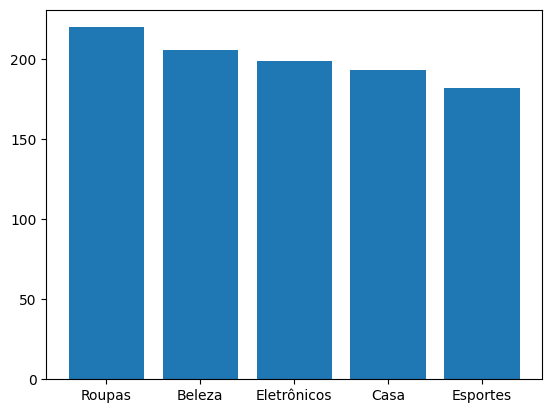

In [20]:
plt.bar(
df_vendas['categoria_produto'].unique(),
df_vendas['categoria_produto'].value_counts())
plt.show()

In [21]:
plt.hist(df_vendas.groupby['cliente_id']['valor_total'].sum())

TypeError: 'method' object is not subscriptable